# **1896-2016 Olimpiyat Oyunları Veri Analizi**

**Veri Seti Hikayesi**

Elimizde 2 veri seti var:

1- **athlete_events:** 

*  1896 Atina Olimpiyatlarından, 2016 Rio Olimpiyatlarına kadar olan oyunların bilgilerini içeriyor. 
*  271116 satır ve 15 sütun'dan oluşuyor.

2- **noc_regions:**


*  NOC, ülke bilgileri, notlar'dan oluşan 3 sütuna ve 230 satıra sahip.  





# Veriyi Anlama ve Hazırlama

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Data setleri okuma
olympics = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [ ]:
#Data Setleri Hakkında Önbilgi
print(olympics.shape)
print(regions.shape)


(271116, 15)
(230, 3)


In [ ]:
olympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [153]:
regions.head()


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Olympics setindeki ilk 10 satırına baktığımızda:

-Aynı ID'li yarışmacıların birden fazla bilgisinin olduğunu gözlemleyebiliriz. Bunun sebebi farklı yarışlarda yarıştıkları için.
-Dataset NaN veriler içeriyor.

In [ ]:
olympics.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [ ]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Olmayan veriler **yaş, uzunluk, ağırlık ve madalya** kategorilerinde. Yaş, uzunluk ve ağırlık girilmemiş olarak düşündüm. Madalya da ise girilmeyen veriler madalya almayanları ifade ediyor olabilir. 

In [ ]:
mergedata = pd.merge(olympics, regions, on ="NOC", how="left")
mergedata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
mergedata.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
print("Age")
print(np.sort(olympics.Age.unique()))

print("Team:")
print(olympics.Team.unique())

print("Years:")
print(np.sort(olympics.Year.unique()))

print("Sport:")
print(olympics.Sport.unique())

print("Medal:")
print(olympics.Medal.unique())


Age
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 80. 81. 84. 88.
 96. 97. nan]
Team:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']
Years:
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]
Sport:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Fi

# **Data Analizler ve Görselleştirme**

**Yarışmacı Profili Analizi**

In [ ]:
olympics_gender=olympics['Sex'].value_counts()
olympics_gender.head()

M    196594
F     74522
Name: Sex, dtype: int64

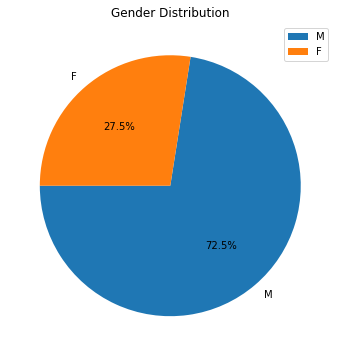

In [ ]:
plt.figure(figsize=(10,))
plt.title('Gender Distribution')
plt.pie(olympics_gender, labels=olympics_gender.index, autopct='%1.1f%%', startangle=180);
plt.legend()

In [154]:
olympics.groupby(['Season', 'Sex'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Season Sex                                  
Summer F    23.660997  168.169025  60.087644
       M    26.443944  178.901874  75.604195
Winter F    24.014398  166.528250  59.755156
       M    25.504261  178.668699  76.357058

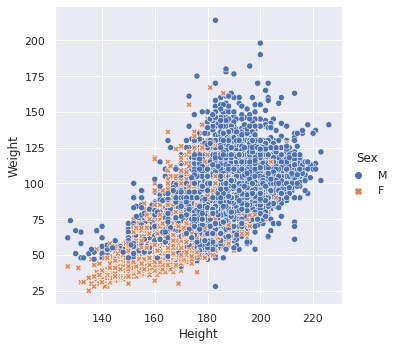

In [108]:
sns.relplot(data=olympics, x='Height', y='Weight', hue='Sex', style='Sex')

In [110]:
mergedata.loc[mergedata['Weight']>200]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Guam,NaN
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN,Guam,NaN


In [114]:
mergedata.loc[mergedata['Height']== 226]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,China,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [115]:
olympics.groupby(['Season', 'Sex'])['Age'].agg(['min', 'mean', 'median', 'max'])

min       mean  median   max
Season Sex                               
Summer F    11.0  23.660997    23.0  74.0
       M    10.0  26.443944    25.0  97.0
Winter F    11.0  24.014398    24.0  48.0
       M    12.0  25.504261    25.0  58.0

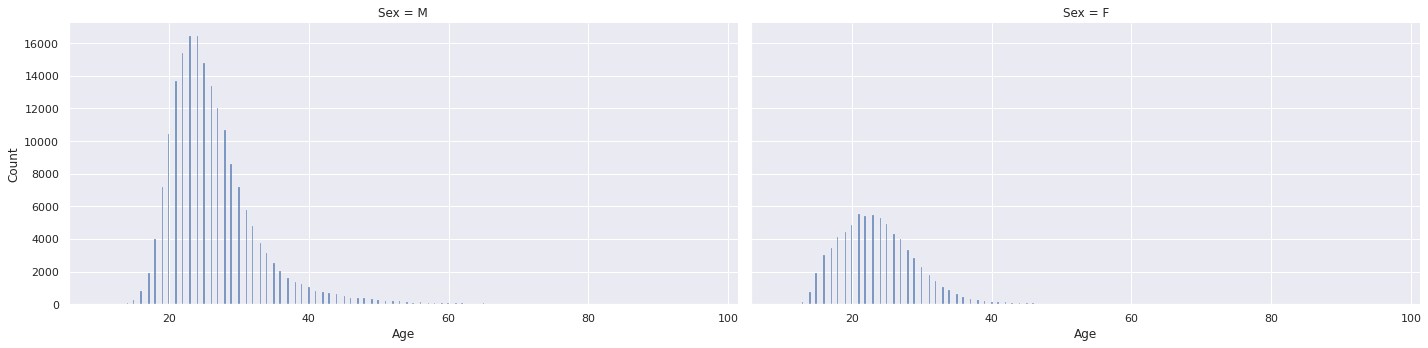

In [116]:
sns.displot(data=olympics, x='Age', col='Sex', aspect=2)

In [ ]:
goldMedals = mergedata[(mergedata.Medal == 'Gold')]
goldMedals.head()
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Age Distribution of Gold Medals')

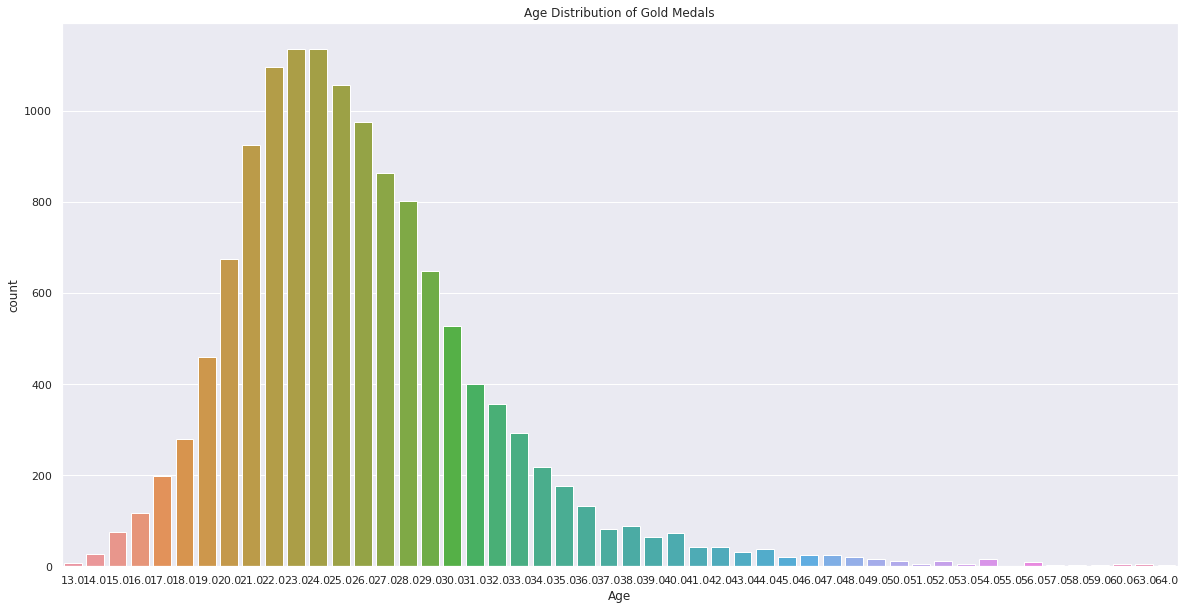

In [ ]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Age Distribution of Gold Medals')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gold Medals for Athletes < 15 ')

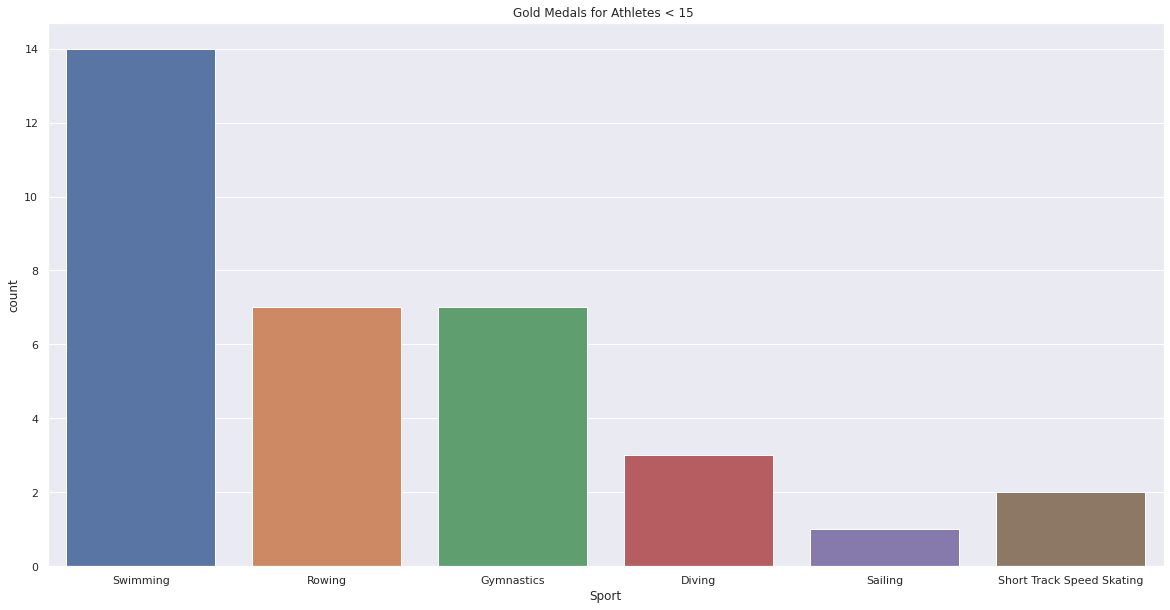

In [ ]:
goldSports = goldMedals['Sport'][goldMedals['Age'] < 15 ]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldSports)
plt.title('Gold Medals for Athletes < 15 ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gold Medals for Athletes > 55 ')

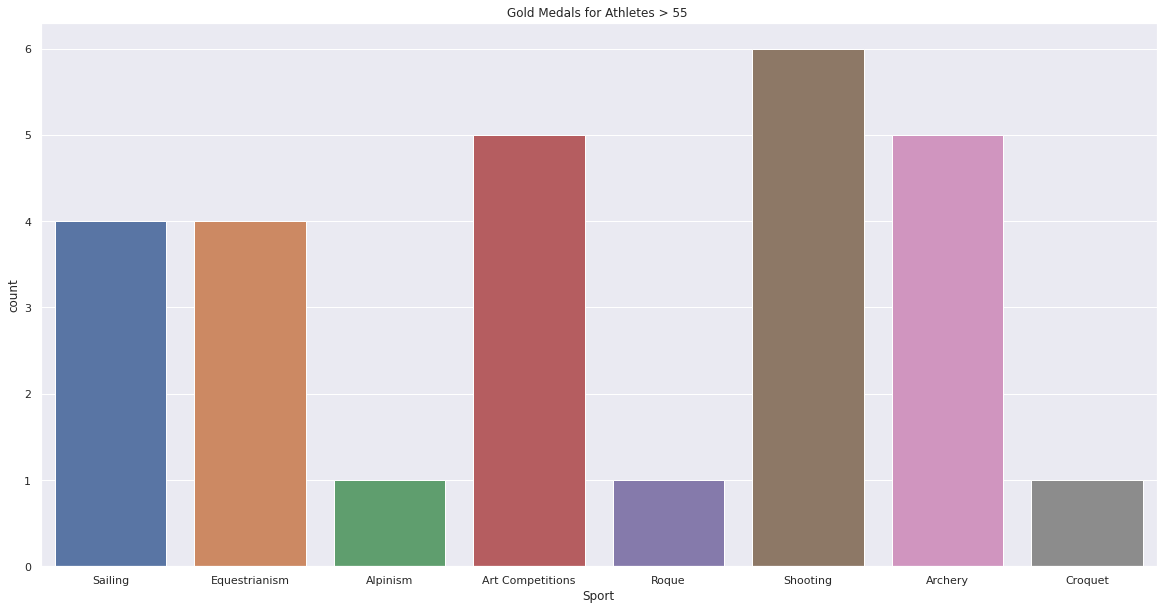

In [ ]:
goldSports = goldMedals['Sport'][goldMedals['Age'] > 55 ]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldSports)
plt.title('Gold Medals for Athletes > 55 ')

**Olimpiyatlarda Kadın Yarışmacılar**

In [ ]:
womenOlympics = mergedata[(mergedata.Sex == 'F') & (mergedata.Season == 'Summer')]
womenOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Women Distributions in Summer Games')

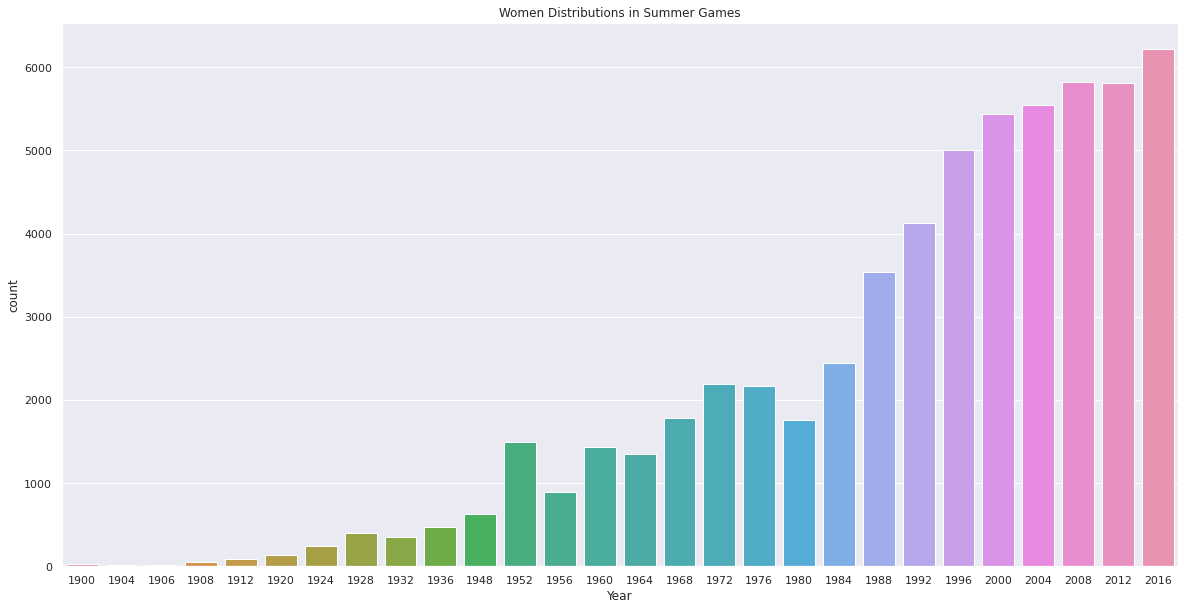

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenOlympics)
plt.title('Women Distributions in Summer Games')

**Ülke Analizleri**

In [130]:
goldMedals = mergedata[(mergedata.Medal == 'Gold')]
goldMedals.region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Medals per Country')

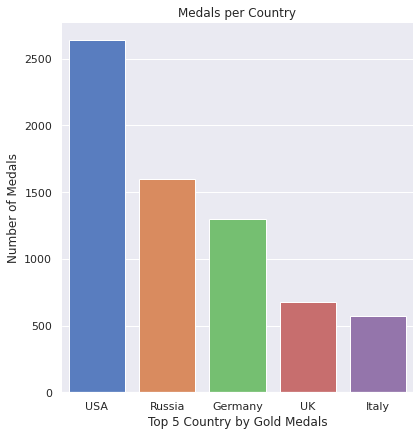

In [131]:
top_goldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=top_goldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 Country by Gold Medals")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [161]:
#Madalya Fonksiyonu
def Search(year,sport, Medal="Gold"):   
    data_find=mergedata[(mergedata['Year']==year) & (mergedata['Sport']==sport) & (mergedata['Medal']==Medal)]
    return data_find
Search(2012,"Sailing")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2692,1498,"Charles Benedict ""Ben"" Ainslie",M,35.0,183.0,90.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Sailing,Sailing Men's One Person Heavyweight Dinghy,Gold,UK,NaN
3833,2210,Marina Alabau Neira,F,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold,Spain,NaN
4317,2464,Jo Qesem Ayela Aleh,F,26.0,171.0,58.0,New Zealand,NZL,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Two Person Dinghy,Gold,New Zealand,NaN
18004,9567,Mathew Belcher,M,29.0,173.0,62.0,Australia,AUS,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Dinghy,Gold,Australia,NaN
61093,31301,Tmara Echegoyen Domnguez,F,28.0,174.0,70.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Three Person Keelboat,Gold,Spain,NaN
107592,54381,Iain Jensen,M,24.0,186.0,80.0,Australia,AUS,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Skiff,Gold,Australia,NaN
142077,71267,Fredrik Max Emil Lf,M,42.0,190.0,97.0,Sweden,SWE,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Keelboat,Gold,Sweden,NaN
179365,90144,Nathan Outteridge,M,26.0,179.0,75.0,Australia,AUS,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Skiff,Gold,Australia,NaN
180190,90556,Malcolm George Page,M,40.0,185.0,71.0,Australia,AUS,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Dinghy,Gold,Australia,NaN
192501,96660,"Olivia Elizabeth ""Polly"" Powrie",F,24.0,173.0,70.0,New Zealand,NZL,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Two Person Dinghy,Gold,New Zealand,NaN


In [162]:
def Search(year,sport, team):   
    data_find=mergedata[(mergedata['Year']==year) & (mergedata['Sport']==sport) & (mergedata['Team']==team)]
    return data_find
Search(2012,"Sailing", "Germany")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
16301,8757,Hannes Baumann,M,29.0,188.0,77.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Skiff,NaN,Germany,NaN
17999,9564,Friederike Belcher (Ziegelmayer-),F,30.0,180.0,70.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Two Person Dinghy,NaN,Germany,NaN
53293,27356,Moana Delle,F,23.0,167.0,57.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,NaN,Germany,NaN
70899,36089,Patrick Follmann,M,23.0,193.0,74.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Dinghy,NaN,Germany,NaN
78508,39844,Ferdinand Gerz,M,23.0,176.0,62.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Dinghy,NaN,Germany,NaN
81205,41218,Franziska Goltz,F,27.0,168.0,68.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Women's One Person Dinghy,NaN,Germany,NaN
85198,43214,Simon Grotelschen,M,25.0,194.0,84.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's One Person Dinghy,NaN,Germany,NaN
111738,56566,Kathrin Kadelbach,F,28.0,165.0,58.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Two Person Dinghy,NaN,Germany,NaN
120761,61100,Frithjof Kleen,M,29.0,189.0,110.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Keelboat,NaN,Germany,NaN
212180,106522,Tobias Schadewaldt,M,27.0,177.0,78.0,Germany,GER,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Skiff,NaN,Germany,NaN


**Olimpiyatlarda Türkiye**

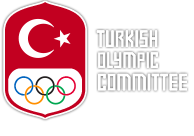

In [139]:
olympicsTr=mergedata['Team']=="Turkey"
mergedata[olympicsTr].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Lightweight,NaN,Turkey,NaN
745,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 1,500 metres",NaN,Turkey,NaN
746,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 5,000 metres",NaN,Turkey,NaN
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey,NaN
748,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN,Turkey,NaN


In [122]:
mergedata.loc[(mergedata['Medal'] == 'Gold') & (mergedata['Sex']=='F') & (mergedata['Team']=='Turkey')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
33626,17338,Asl akr (-Alptekin),F,26.0,168.0,50.0,Turkey,TUR,2012 Summer,2012,Summer,London,Athletics,"Athletics Women's 1,500 metres",Gold,Turkey,NaN
237002,118844,Nurcan Taylan,F,20.0,151.0,48.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Flyweight,Gold,Turkey,NaN


In [123]:
mergedata.loc[(mergedata['Medal'] == 'Silver') & (mergedata['Sex']=='F') & (mergedata['Team']=='Turkey')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey,NaN
31921,16402,Gamze Bulut,F,19.0,166.0,48.0,Turkey,TUR,2012 Summer,2012,Summer,London,Athletics,"Athletics Women's 1,500 metres",Silver,Turkey,NaN
179730,90324,Sibel zkan,F,20.0,155.0,48.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Flyweight,Silver,Turkey,NaN
236354,118497,Azize Tanrkulu,F,22.0,172.0,57.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Featherweight,Silver,Turkey,NaN
236791,118720,Nur Tatar,F,19.0,173.0,67.0,Turkey,TUR,2012 Summer,2012,Summer,London,Taekwondo,Taekwondo Women's Welterweight,Silver,Turkey,NaN


In [124]:
mergedata.loc[(mergedata['Medal'] == 'Bronze') & (mergedata['Sex']=='F') & (mergedata['Team']=='Turkey')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
21699,11461,Hamide Bkn (-Tosun),F,22.0,167.0,57.0,Turkey,TUR,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Bronze,Turkey,NaN
216465,108675,Hlya enyurt,F,18.0,NaN,NaN,Turkey,TUR,1992 Summer,1992,Summer,Barcelona,Judo,Judo Women's Extra-Lightweight,Bronze,Turkey,NaN
236792,118720,Nur Tatar,F,23.0,173.0,67.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Welterweight,Bronze,Turkey,NaN


In [137]:
mergedata.loc[(mergedata['NOC'] == 'TUR') & (mergedata['City']== 'Rio de Janeiro')]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1552,864,Yasemin Adar,F,24.0,180.0,75.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Heavyweight, Freestyle",NaN,Turkey,NaN
2876,1599,Meryem (Mirriam Jepchirchir-) Akda (Mayo-),F,23.0,171.0,51.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,Turkey,NaN
2878,1600,Tark Langat Akda,M,28.0,176.0,60.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,Turkey,NaN
2926,1634,Taha Akgl,M,25.0,192.0,125.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,Turkey,NaN
3044,1697,Halil Akka,M,33.0,175.0,58.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,Turkey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265766,132979,Nevriye Ylmaz,F,36.0,192.0,85.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Turkey,NaN
265767,132980,Tutya Ylmaz,F,17.0,150.0,48.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Turkey,NaN
265768,132980,Tutya Ylmaz,F,17.0,150.0,48.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Turkey,NaN
265769,132980,Tutya Ylmaz,F,17.0,150.0,48.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Turkey,NaN


In [152]:
#2021 Tokyo Olimpiyatları Türkiye  
turkeyTokyo = pd.read_csv("tokyoTr.csv")
turkeyTokyo.head()

,Name,Sex,Team,NOC,Year,Sport,Medal
0,Mete Gazoz,M,Turkey,TUR,2021,archery,Gold
1,Busenaz Surmeneli,F,Turkey,TUR,2021,boxing,Gold
2,Eray Samdan,M,Turkey,TUR,2021,karate,Silver
3,Buse Naz Cakiroglu,F,Turkey,TUR,2021,boxing,Silver
4,Hakan Recber,M,Turkey,TUR,2021,Taekwondo,Bronze


In [146]:
allTr = pd.concat([mergedata[mergedata['Team'] == 'Turkey'], turkeyTokyo[turkeyTokyo['Team']=='Turkey']],axis =0,
          ignore_index =True) 

In [148]:
allTr.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1361,NaN,Yasemin Adar,F,NaN,NaN,NaN,Turkey,TUR,NaN,2021,NaN,NaN,wrestling,NaN,Bronze,NaN,NaN
1362,NaN,Taha Akgul,M,NaN,NaN,NaN,Turkey,TUR,NaN,2021,NaN,NaN,wrestling,NaN,Bronze,NaN,NaN
1363,NaN,Ali Sofuoglu,M,NaN,NaN,NaN,Turkey,TUR,NaN,2021,NaN,NaN,karate,NaN,Bronze,NaN,NaN
1364,NaN,Merve Coban,F,NaN,NaN,NaN,Turkey,TUR,NaN,2021,NaN,NaN,karate,NaN,Bronze,NaN,NaN
1365,NaN,Ugur Aktas,M,NaN,NaN,NaN,Turkey,TUR,NaN,2021,NaN,NaN,karate,NaN,Bronze,NaN,NaN


In [151]:
allTr.Medal.value_counts().reset_index(name='Medals').head()


,index,Medals
0,Gold,42
1,Bronze,37
2,Silver,29


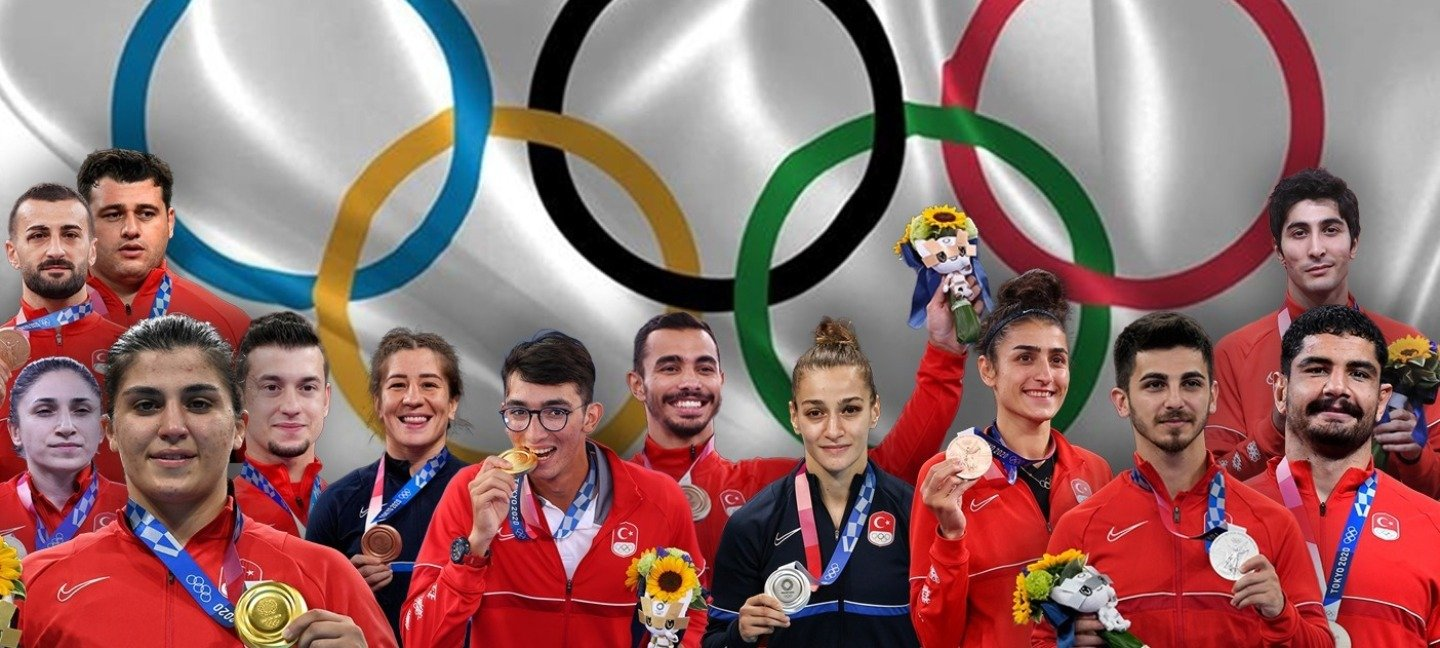